## Plotting GSDs for all basket trap pairs

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import seaborn as sns
import os

Improting Data

In [2]:
# checking environment and working directory
os.getcwd()
working_directory = "C:/Users/huck4481/Documents/GitHub/sediment_trap_paper/trap_GSDs/"
os.chdir(working_directory)

# filenames and directories
filename1 = "./fines/SM23_percentages.csv"
filename2 = "./combined/SM23_percentages_combined.csv"
filename3 = "./fines/SP23_percentages.csv"
filename4 = "./combined/SP23_percentages_combined.csv"

# reading files
dataframe1 = pd.read_csv(filename1)
dataframe2 = pd.read_csv(filename2)
dataframe3 = pd.read_csv(filename3)
dataframe4 = pd.read_csv(filename4)

# getting information
fine_grain_sizes = np.array(dataframe1.iloc[:-1, 0])
combined_grain_sizes = np.array(dataframe2.iloc[:-1, 0])
proportion_sm_fines = np.array(dataframe1.iloc[:-1, 1:]) # summer fines
proportion_sm_combined = np.array(dataframe2.iloc[:-1, 1:]) # summer combined
proportion_sp_fines = np.array(dataframe3.iloc[:-1, 1:]) # spring fines
proportion_sp_combined = np.array(dataframe4.iloc[:-1, 1:]) # spring combined

Calculations

In [3]:
# calculating cumulative sum
summer_fine_gsd = np.cumsum(proportion_sm_fines, axis=0)
summer_combined_gsd = np.cumsum(proportion_sm_combined, axis=0)
spring_fine_gsd = np.cumsum(proportion_sp_fines, axis=0)
spring_combined_gsd = np.cumsum(proportion_sp_combined, axis=0) 

# calculating max, avg and min GSDs of the baskets
# summer
sm_fine_gsd_max = pd.DataFrame(np.max(summer_fine_gsd, axis=1))
sm_fine_gsd_avg = pd.DataFrame(np.mean(summer_fine_gsd, axis=1))
sm_fine_gsd_min = pd.DataFrame(np.min(summer_fine_gsd, axis=1))
sm_combined_gsd_max = pd.DataFrame(np.max(summer_combined_gsd, axis=1))
sm_combined_gsd_avg = pd.DataFrame(np.mean(summer_combined_gsd, axis=1))
sm_combined_gsd_min = pd.DataFrame(np.min(summer_combined_gsd, axis=1))
# spring
sp_fine_gsd_max = pd.DataFrame(np.max(spring_fine_gsd, axis=1))
sp_fine_gsd_avg = pd.DataFrame(np.mean(spring_fine_gsd, axis=1))
sp_fine_gsd_min = pd.DataFrame(np.min(spring_fine_gsd, axis=1))
sp_combined_gsd_max = pd.DataFrame(np.max(spring_combined_gsd, axis=1))
sp_combined_gsd_avg = pd.DataFrame(np.mean(spring_combined_gsd, axis=1))
sp_combined_gsd_min = pd.DataFrame(np.min(spring_combined_gsd, axis=1))

# convert to pandas dataframe - FOR CUMULATIVE PROPORTIONS 
summer_fine_gsd = pd.DataFrame(summer_fine_gsd)
summer_combined_gsd = pd.DataFrame(summer_combined_gsd)
spring_fine_gsd = pd.DataFrame(spring_fine_gsd)
spring_combined_gsd = pd.DataFrame(spring_combined_gsd)
# column names of dataframes are the same as the ones from dataframe1, 2, 3 and 4
summer_fine_gsd.columns = dataframe1.columns[1:]
summer_combined_gsd.columns = dataframe2.columns[1:]
spring_fine_gsd.columns = dataframe3.columns[1:]
spring_combined_gsd.columns = dataframe4.columns[1:]
# make the index of the dataframes the values in grain_sizes array
summer_fine_gsd.index = fine_grain_sizes
summer_combined_gsd.index = combined_grain_sizes
spring_fine_gsd.index = fine_grain_sizes
spring_combined_gsd.index = combined_grain_sizes

# convert to pandas dataframe - FOR PERCENTAGES (PDFS)
proportion_sm_fines = pd.DataFrame(proportion_sm_fines)
proportion_sm_combined = pd.DataFrame(proportion_sm_combined)
proportion_sp_fines = pd.DataFrame(proportion_sp_fines)
proportion_sp_combined = pd.DataFrame(proportion_sp_combined)
# column names of dataframes are the same as the ones from dataframe1, 2, 3 and 4
proportion_sm_fines.columns = dataframe1.columns[1:]
proportion_sm_combined.columns = dataframe2.columns[1:]
proportion_sp_fines.columns = dataframe3.columns[1:]
proportion_sp_combined.columns = dataframe4.columns[1:]
# make the index of the dataframes the values in grain_sizes array
proportion_sm_fines.index = fine_grain_sizes
proportion_sm_combined.index = combined_grain_sizes
proportion_sp_fines.index = fine_grain_sizes
proportion_sp_combined.index = combined_grain_sizes

## Fine Sediment Plots - Only LISST 

### CDFs

In [ ]:
results_directory = "./plots/CDF_fines/"

T1 - AB

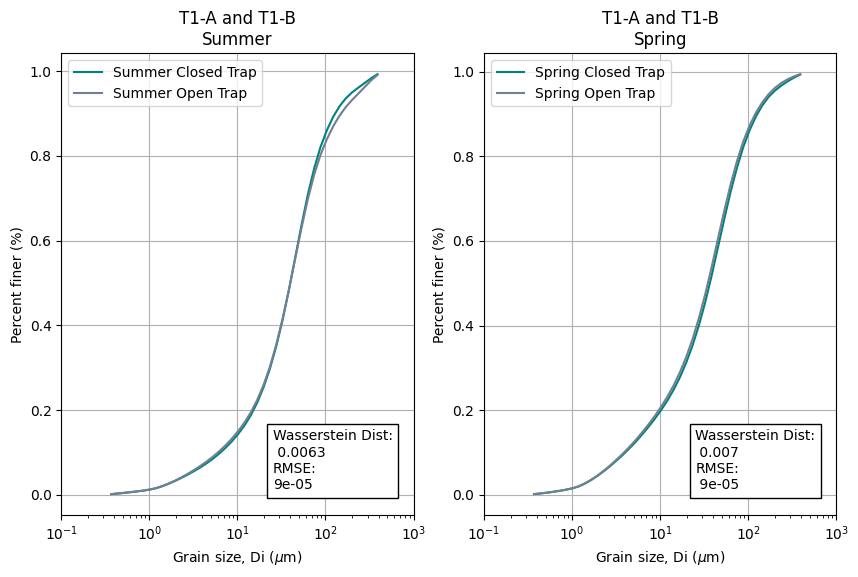

In [7]:
# determining parameters
title = "T1-A and T1-B"
outname = "T1A-T1B_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T1-B'].values.flatten()
summer_closed = summer_fine_gsd['T1-A'].values.flatten()
spring_open = spring_fine_gsd['T1-B'].values.flatten()
spring_closed = spring_fine_gsd['T1-A'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T1 - CD 

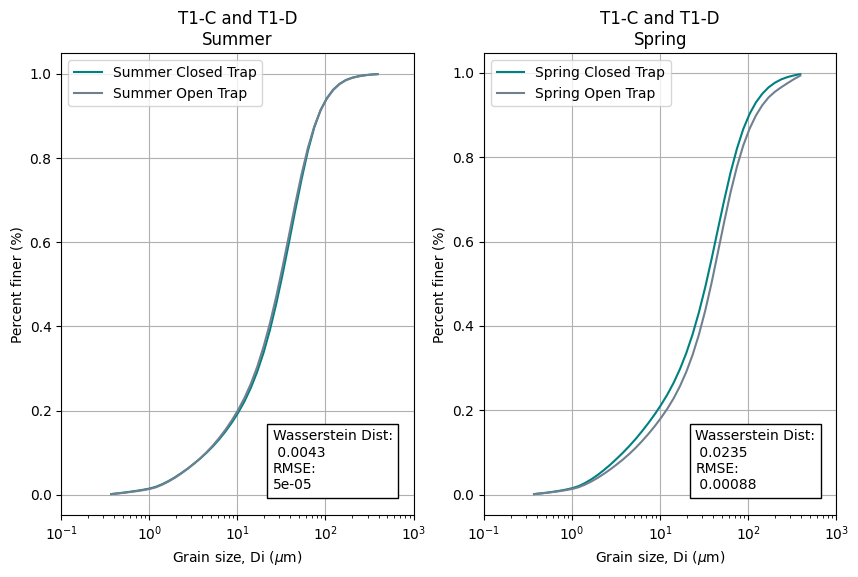

In [8]:
# determining parameters
title = "T1-C and T1-D"
outname = "T1C-T1D_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T1-C'].values.flatten()
summer_closed = summer_fine_gsd['T1-D'].values.flatten()
spring_open = spring_fine_gsd['T1-C'].values.flatten()
spring_closed = spring_fine_gsd['T1-D'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T2 - AB

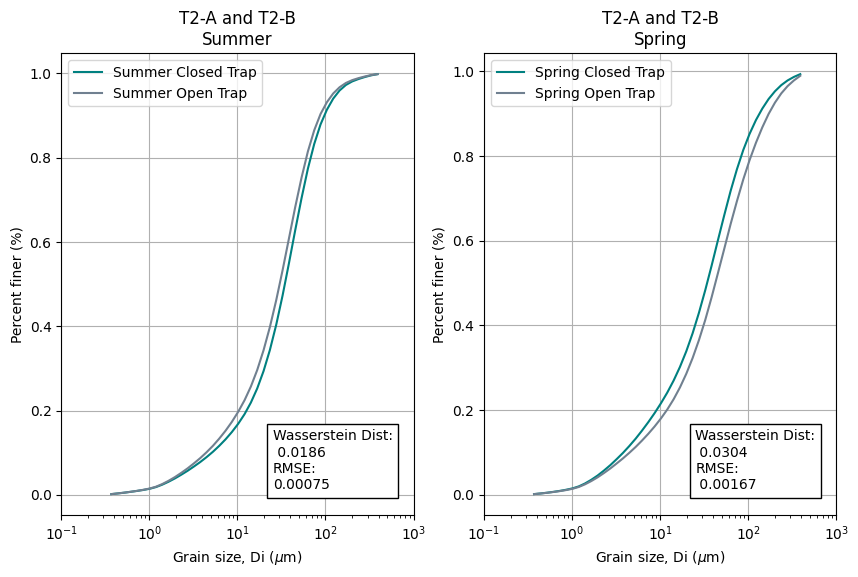

In [9]:
# determining parameters
title = "T2-A and T2-B"
outname = "T2A-T2B_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T2-B'].values.flatten()
summer_closed = summer_fine_gsd['T2-A'].values.flatten()
spring_open = spring_fine_gsd['T2-B'].values.flatten()
spring_closed = spring_fine_gsd['T2-A'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T3 - CD

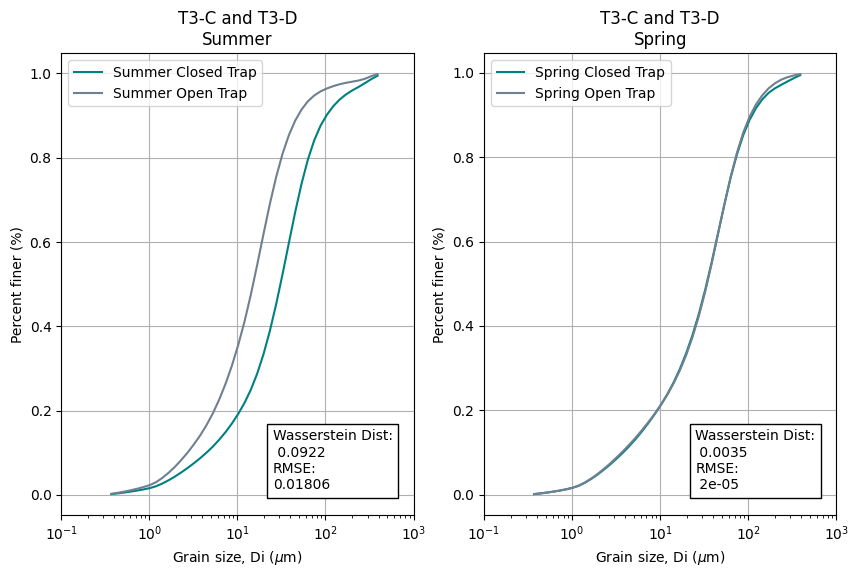

In [10]:
# determining parameters
title = "T3-C and T3-D"
outname = "T3C-T3D_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T3-C'].values.flatten()
summer_closed = summer_fine_gsd['T3-D'].values.flatten()
spring_open = spring_fine_gsd['T3-C'].values.flatten()
spring_closed = spring_fine_gsd['T3-D'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T5 - AB

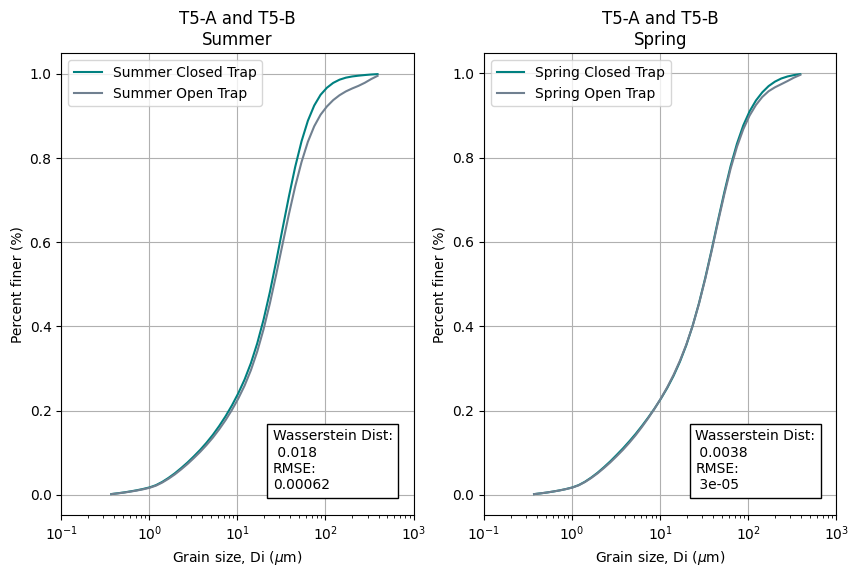

In [11]:
# determining parameters
title = "T5-A and T5-B"
outname = "T5A-T5B_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T5-B'].values.flatten()
summer_closed = summer_fine_gsd['T5-A'].values.flatten()
spring_open = spring_fine_gsd['T5-B'].values.flatten()
spring_closed = spring_fine_gsd['T5-A'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T5 - CD

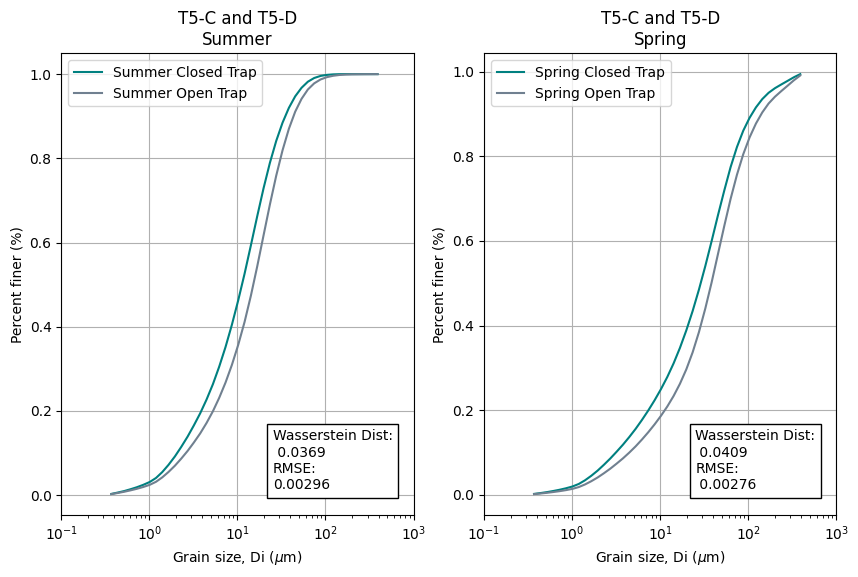

In [12]:
# determining parameters
title = "T5-C and T5-D"
outname = "T5C-T5D_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T5-C'].values.flatten()
summer_closed = summer_fine_gsd['T5-D'].values.flatten()
spring_open = spring_fine_gsd['T5-C'].values.flatten()
spring_closed = spring_fine_gsd['T5-D'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T6 - CD

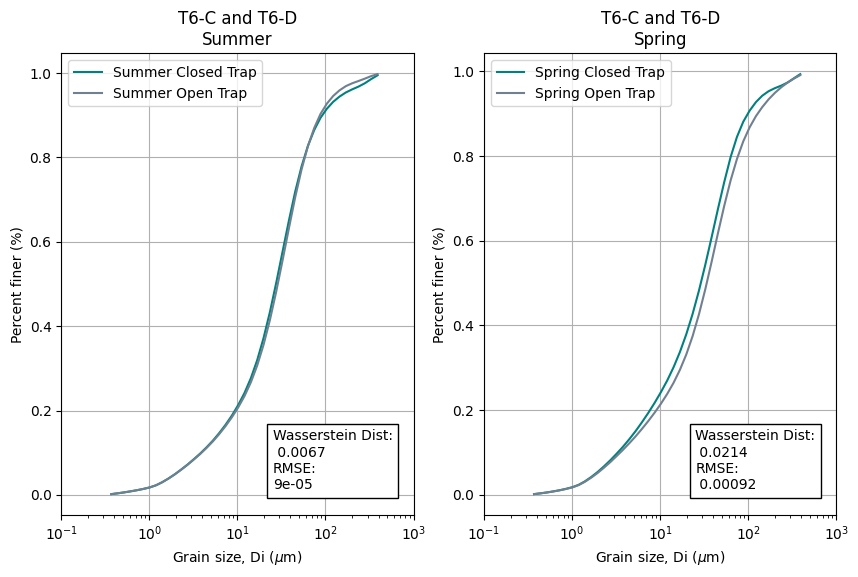

In [40]:
# determining parameters
title = "T6-C and T6-D"
outname = "T6C-T6D_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T6-C'].values.flatten()
summer_closed = summer_fine_gsd['T6-D'].values.flatten()
spring_open = spring_fine_gsd['T6-C'].values.flatten()
spring_closed = spring_fine_gsd['T6-D'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T7 - AB

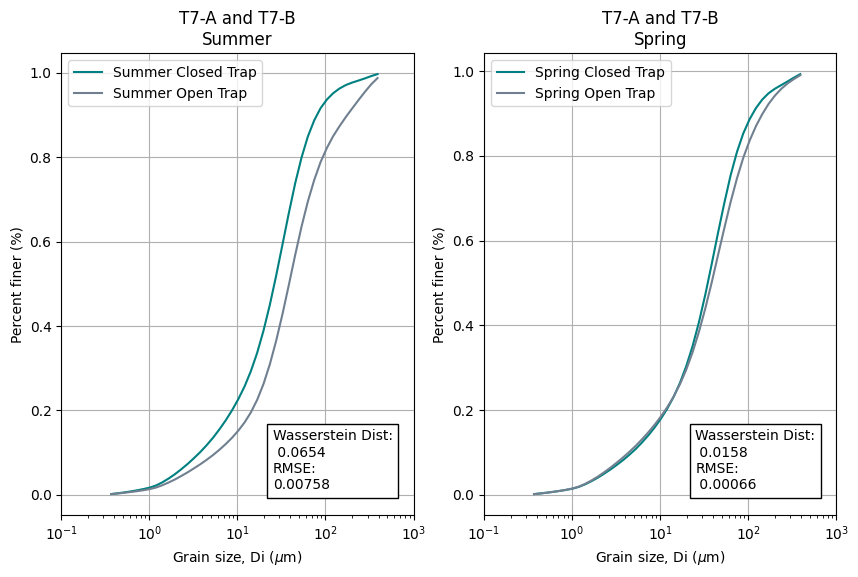

In [14]:
# determining parameters
title = "T7-A and T7-B"
outname = "T7A-T17B_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T7-B'].values.flatten()
summer_closed = summer_fine_gsd['T7-A'].values.flatten()
spring_open = spring_fine_gsd['T7-B'].values.flatten()
spring_closed = spring_fine_gsd['T7-A'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T7 - CD

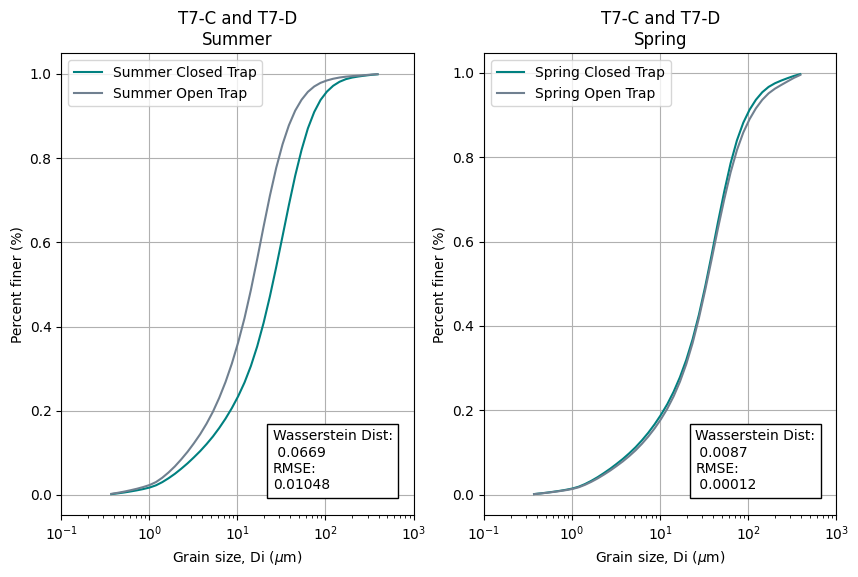

In [15]:
# determining parameters
title = "T7-C and T7-D"
outname = "T7C-T7D_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T7-C'].values.flatten()
summer_closed = summer_fine_gsd['T7-D'].values.flatten()
spring_open = spring_fine_gsd['T7-C'].values.flatten()
spring_closed = spring_fine_gsd['T7-D'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T8 - CD

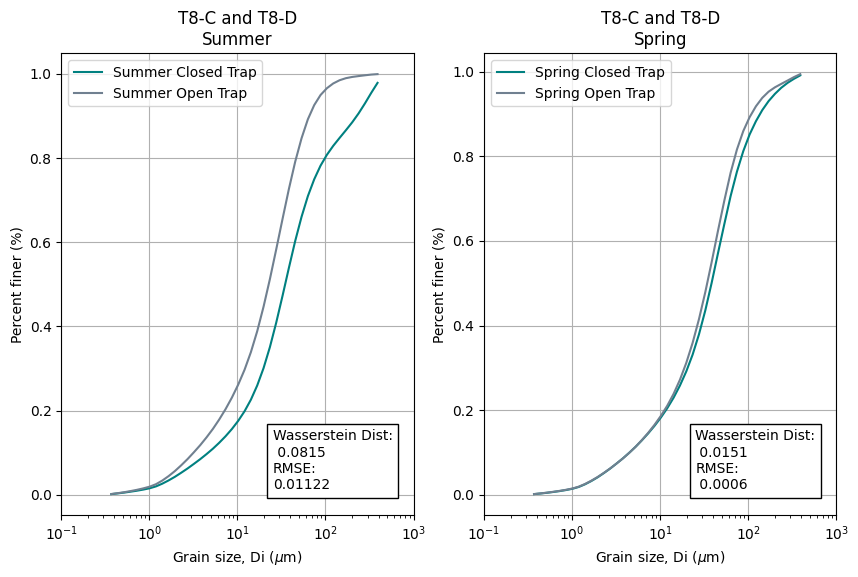

In [16]:
# determining parameters
title = "T8-C and T8-D"
outname = "T8C-T8D_fine"

# flattening the dataframes
summer_open = summer_fine_gsd['T8-C'].values.flatten()
summer_closed = summer_fine_gsd['T8-D'].values.flatten()
spring_open = spring_fine_gsd['T8-C'].values.flatten()
spring_closed = spring_fine_gsd['T8-D'].values.flatten()
grain_sizes = np.array(summer_fine_gsd.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
plt.rcParams.update({'figure.facecolor':'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Percent finer (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')
# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

# text boxes
# text boxes
tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.6, 0.05, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.6, 0.05, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

### PDFs

In [17]:
results_directory = "./plots/PDF_fines/"

T1 - AB

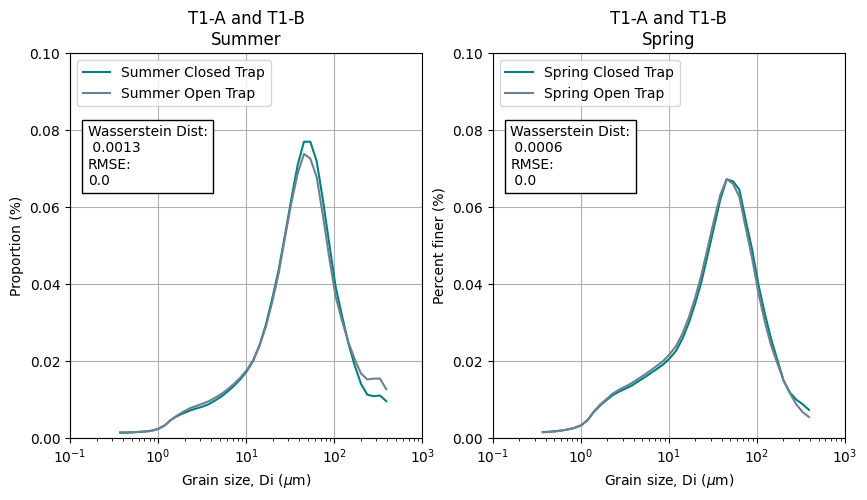

In [29]:
# determining parameters
title = "T1-A and T1-B"
outname = "T1A-T1B_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T1-B'].values.flatten()
summer_closed = proportion_sm_fines['T1-A'].values.flatten()
spring_open = proportion_sp_fines['T1-B'].values.flatten()
spring_closed = proportion_sp_fines['T1-A'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T1 - CD

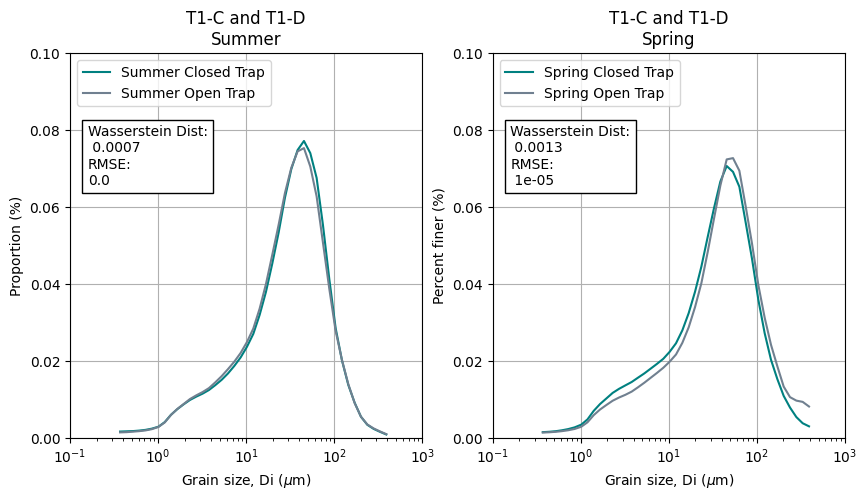

In [30]:
# determining parameters
title = "T1-C and T1-D"
outname = "T1C-T1D_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T1-C'].values.flatten()
summer_closed = proportion_sm_fines['T1-D'].values.flatten()
spring_open = proportion_sp_fines['T1-C'].values.flatten()
spring_closed = proportion_sp_fines['T1-D'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T2 - AB

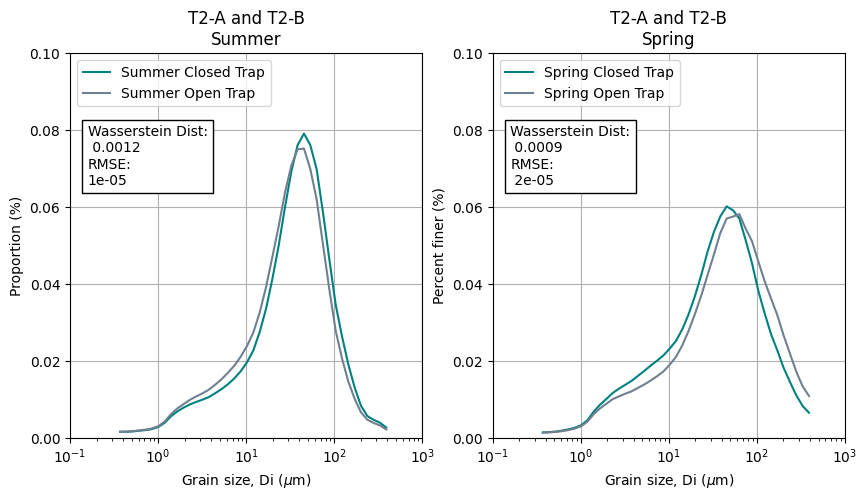

In [31]:
# determining parameters
title = "T2-A and T2-B"
outname = "T2A-T2B_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T2-B'].values.flatten()
summer_closed = proportion_sm_fines['T2-A'].values.flatten()
spring_open = proportion_sp_fines['T2-B'].values.flatten()
spring_closed = proportion_sp_fines['T2-A'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T3 - CD

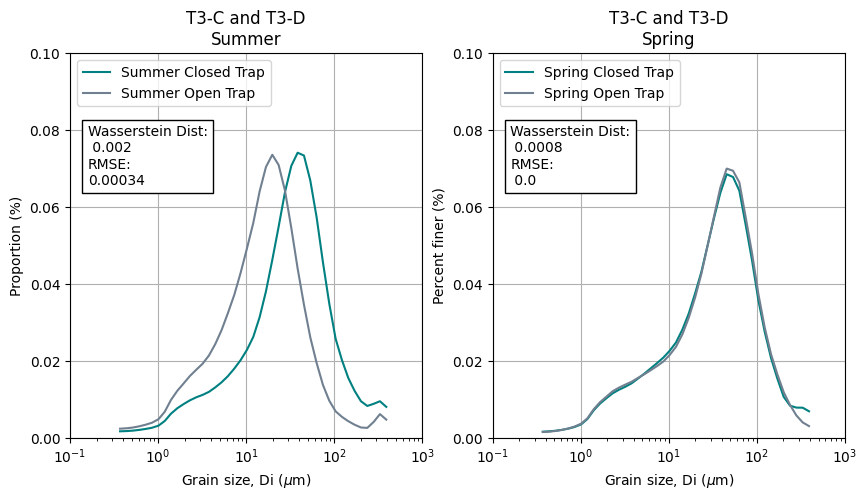

In [35]:
# determining parameters
title = "T3-C and T3-D"
outname = "T3C-T3D_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T3-C'].values.flatten()
summer_closed = proportion_sm_fines['T3-D'].values.flatten()
spring_open = proportion_sp_fines['T3-C'].values.flatten()
spring_closed = proportion_sp_fines['T3-D'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T5 - AB

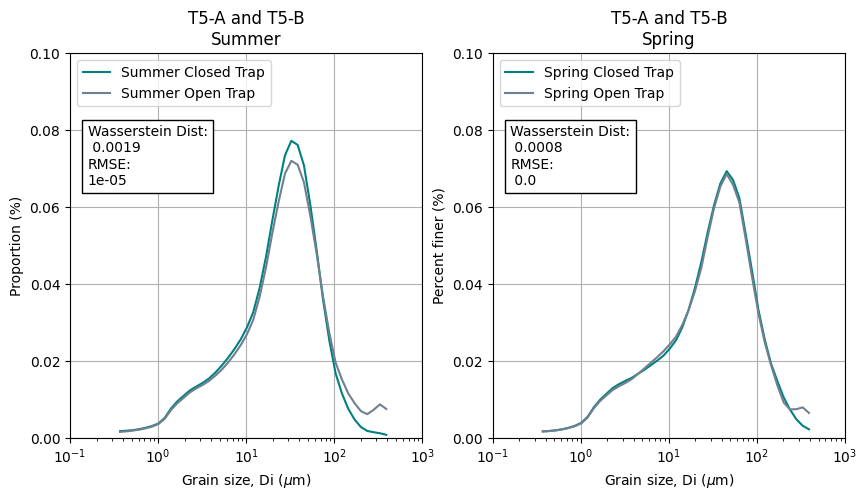

In [33]:
# determining parameters
title = "T5-A and T5-B"
outname = "T5A-T5B_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T5-B'].values.flatten()
summer_closed = proportion_sm_fines['T5-A'].values.flatten()
spring_open = proportion_sp_fines['T5-B'].values.flatten()
spring_closed = proportion_sp_fines['T5-A'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T5 - CD

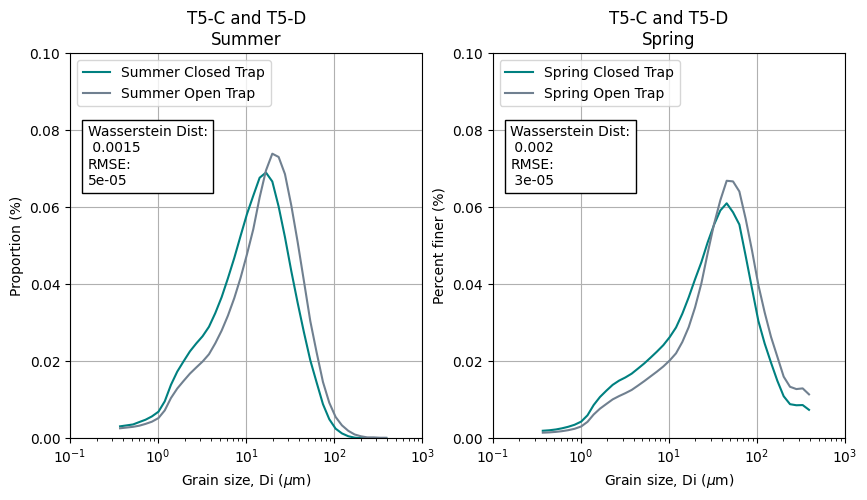

In [36]:
# determining parameters
title = "T5-C and T5-D"
outname = "T5C-T5D_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T5-C'].values.flatten()
summer_closed = proportion_sm_fines['T5-D'].values.flatten()
spring_open = proportion_sp_fines['T5-C'].values.flatten()
spring_closed = proportion_sp_fines['T5-D'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T6 - CD

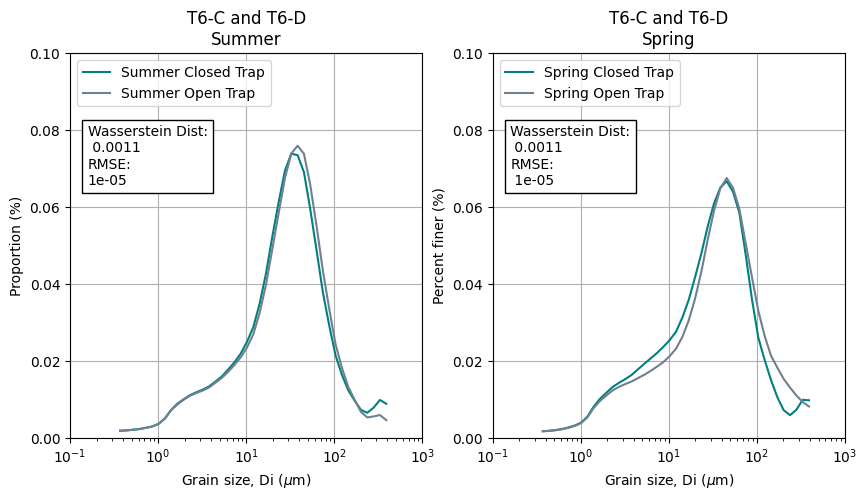

In [41]:
# determining parameters
title = "T6-C and T6-D"
outname = "T6C-T6D_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T6-C'].values.flatten()
summer_closed = proportion_sm_fines['T6-D'].values.flatten()
spring_open = proportion_sp_fines['T6-C'].values.flatten()
spring_closed = proportion_sp_fines['T6-D'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T7 - AB

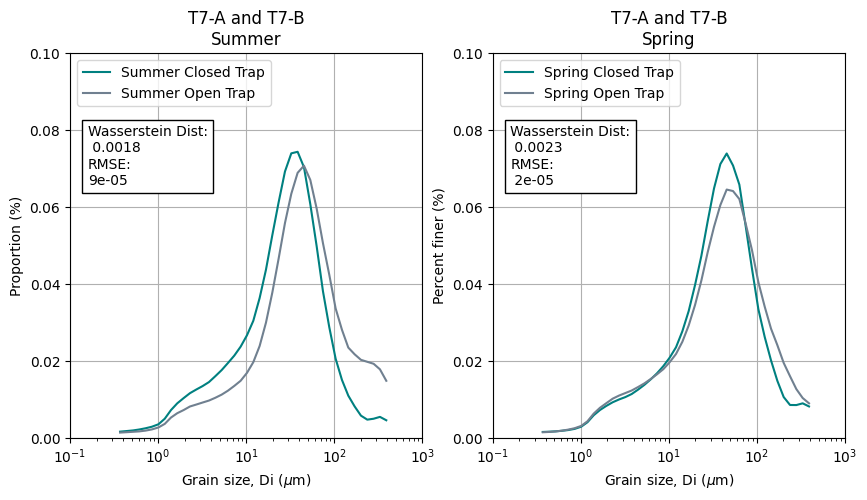

In [34]:
# determining parameters
title = "T7-A and T7-B"
outname = "T7A-T7B_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T7-B'].values.flatten()
summer_closed = proportion_sm_fines['T7-A'].values.flatten()
spring_open = proportion_sp_fines['T7-B'].values.flatten()
spring_closed = proportion_sp_fines['T7-A'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T7 - CD

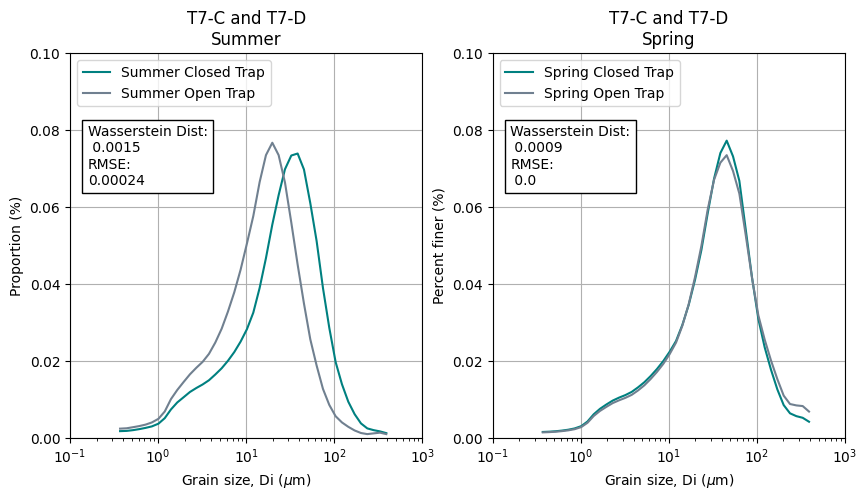

In [38]:
# determining parameters
title = "T7-C and T7-D"
outname = "T7C-T7D_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T7-C'].values.flatten()
summer_closed = proportion_sm_fines['T7-D'].values.flatten()
spring_open = proportion_sp_fines['T7-C'].values.flatten()
spring_closed = proportion_sp_fines['T7-D'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T8 - CD

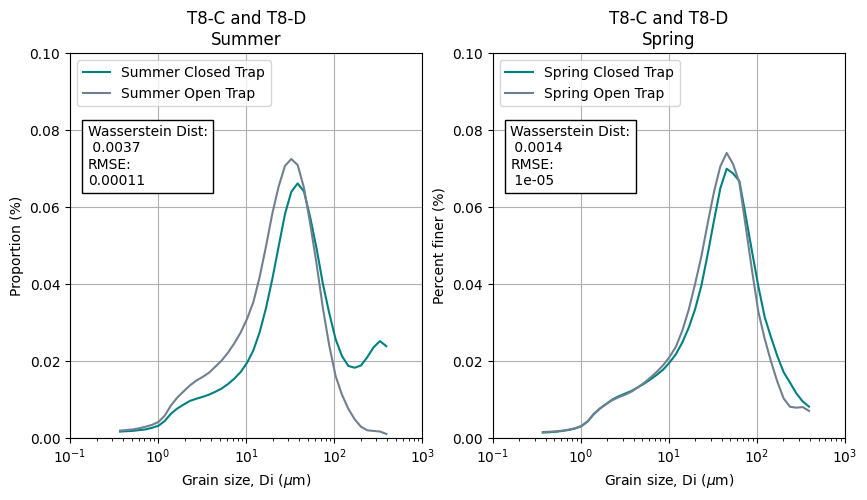

In [39]:
# determining parameters
title = "T8-C and T8-D"
outname = "T8C-T8D_fine"

# flattening the dataframes
summer_open = proportion_sm_fines['T8-C'].values.flatten()
summer_closed = proportion_sm_fines['T8-D'].values.flatten()
spring_open = proportion_sp_fines['T8-C'].values.flatten()
spring_closed = proportion_sp_fines['T8-D'].values.flatten()
grain_sizes = np.array(proportion_sp_fines.index)
# calculating Wasserstein distance and RMSE
summer_distance = np.round(wasserstein_distance(summer_open, summer_closed),4)
summer_rmse = np.round(np.mean((summer_open - summer_closed)**2), 5)
spring_distance = np.round(wasserstein_distance(spring_open, spring_closed),4)
spring_rmse = np.round(np.mean((spring_open - spring_closed)**2), 5)

# actual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.rcParams.update({'figure.facecolor': 'white'})
sns.reset_orig()

# summer
ax1.plot(grain_sizes, summer_closed, color='teal', label="Summer Closed Trap", linestyle="solid")
ax1.plot(grain_sizes, summer_open, color='slategray', label="Summer Open Trap", linestyle="solid")
ax1.set_xlabel("Grain size, Di ($\mu$m)")
ax1.set_ylabel("Proportion (%)")
ax1.grid(True)
ax1.set_xscale('log')
ax1.set_xlim((0.1, 1000))
ax1.set_ylim(0,0.1)
ax1.set_title(title + "\nSummer")
ax1.legend(loc='upper left')

# spring
ax2.plot(grain_sizes, spring_closed, color='teal', label="Spring Closed Trap", linestyle="solid")
ax2.plot(grain_sizes, spring_open, color='slategray', label="Spring Open Trap", linestyle="solid")
ax2.set_xlabel("Grain size, Di ($\mu$m)")
ax2.set_ylabel("Percent finer (%)")
ax2.grid(True)
ax2.set_xscale('log')
ax2.set_xlim((0.1, 1000))
ax2.set_ylim(0,0.1)
ax2.set_title(title + "\nSpring")
ax2.legend(loc='upper left')

tempString1 = "Wasserstein Dist:\n " + str(summer_distance) + "\nRMSE:\n" + str(summer_rmse)
ax1.text(0.05, 0.65, tempString1, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax1.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

tempString2 = "Wasserstein Dist:\n " + str(spring_distance) + "\nRMSE:\n " + str(spring_rmse)
ax2.text(0.05, 0.65, tempString2, fontsize=10, horizontalalignment='left', verticalalignment='bottom', 
        transform=ax2.transAxes, bbox=dict(facecolor='white', edgecolor='black'), zorder=10)

plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

## Fine Sediment - Proportion Differences

from PDF

In [58]:
fine_summer_prop_dif = pd.DataFrame()
fine_spring_prop_dif = pd.DataFrame()
fine_prop_dif = pd.DataFrame({'trap_pair': ['T1AB', 'T1CD', 'T2AB', 'T3CD', 'T5AB', 'T5CD', 'T6CD', 'T7AB', 'T7CD', 'T8CD']})
# open minus the closed trap - summer
fine_summer_prop_dif['T1AB'] = (proportion_sm_fines['T1-B'] - proportion_sm_fines['T1-A'])
fine_summer_prop_dif['T1CD'] = (proportion_sm_fines['T1-C'] - proportion_sm_fines['T1-D'])
fine_summer_prop_dif['T2AB'] = (proportion_sm_fines['T2-B'] - proportion_sm_fines['T2-A'])
fine_summer_prop_dif['T3CD'] = (proportion_sm_fines['T3-C'] - proportion_sm_fines['T3-D'])
fine_summer_prop_dif['T5AB'] = (proportion_sm_fines['T5-B'] - proportion_sm_fines['T5-A'])
fine_summer_prop_dif['T5CD'] = (proportion_sm_fines['T5-C'] - proportion_sm_fines['T5-D'])
fine_summer_prop_dif['T6CD'] = (proportion_sm_fines['T6-C'] - proportion_sm_fines['T6-D'])
fine_summer_prop_dif['T7AB'] = (proportion_sm_fines['T7-B'] - proportion_sm_fines['T7-A'])
fine_summer_prop_dif['T7CD'] = (proportion_sm_fines['T7-C'] - proportion_sm_fines['T7-D'])
fine_summer_prop_dif['T8CD'] = (proportion_sm_fines['T8-C'] - proportion_sm_fines['T8-D'])

# open minus the closed trap - spring
fine_spring_prop_dif['T1AB'] = (proportion_sp_fines['T1-B'] - proportion_sp_fines['T1-A'])
fine_spring_prop_dif['T1CD'] = (proportion_sp_fines['T1-C'] - proportion_sp_fines['T1-D'])
fine_spring_prop_dif['T2AB'] = (proportion_sp_fines['T2-B'] - proportion_sp_fines['T2-A'])
fine_spring_prop_dif['T3CD'] = (proportion_sp_fines['T3-C'] - proportion_sp_fines['T3-D'])
fine_spring_prop_dif['T5AB'] = (proportion_sp_fines['T5-B'] - proportion_sp_fines['T5-A'])
fine_spring_prop_dif['T5CD'] = (proportion_sp_fines['T5-C'] - proportion_sp_fines['T5-D'])
fine_spring_prop_dif['T6CD'] = (proportion_sp_fines['T6-C'] - proportion_sp_fines['T6-D'])
fine_spring_prop_dif['T7AB'] = (proportion_sp_fines['T7-B'] - proportion_sp_fines['T7-A'])
fine_spring_prop_dif['T7CD'] = (proportion_sp_fines['T7-C'] - proportion_sp_fines['T7-D'])
fine_spring_prop_dif['T8CD'] = (proportion_sp_fines['T8-C'] - proportion_sp_fines['T8-D'])

fine_prop_dif['summer_mean'] = fine_summer_prop_dif.mean().values
fine_prop_dif['spring_mean'] = fine_spring_prop_dif.mean().values


from CDF

In [59]:
fine_summer_prop_dif = pd.DataFrame()
fine_spring_prop_dif = pd.DataFrame()
fine_prop_dif = pd.DataFrame({'trap_pair': ['T1AB', 'T1CD', 'T2AB', 'T3CD', 'T5AB', 'T5CD', 'T6CD', 'T7AB', 'T7CD', 'T8CD']})
# open minus the closed trap - summer
fine_summer_prop_dif['T1AB'] = (summer_fine_gsd['T1-B'] - summer_fine_gsd['T1-A'])
fine_summer_prop_dif['T1CD'] = (summer_fine_gsd['T1-C'] - summer_fine_gsd['T1-D'])
fine_summer_prop_dif['T2AB'] = (summer_fine_gsd['T2-B'] - summer_fine_gsd['T2-A'])
fine_summer_prop_dif['T3CD'] = (summer_fine_gsd['T3-C'] - summer_fine_gsd['T3-D'])
fine_summer_prop_dif['T5AB'] = (summer_fine_gsd['T5-B'] - summer_fine_gsd['T5-A'])
fine_summer_prop_dif['T5CD'] = (summer_fine_gsd['T5-C'] - summer_fine_gsd['T5-D'])
fine_summer_prop_dif['T6CD'] = (summer_fine_gsd['T6-C'] - summer_fine_gsd['T6-D'])
fine_summer_prop_dif['T7AB'] = (summer_fine_gsd['T7-B'] - summer_fine_gsd['T7-A'])
fine_summer_prop_dif['T7CD'] = (summer_fine_gsd['T7-C'] - summer_fine_gsd['T7-D'])
fine_summer_prop_dif['T8CD'] = (summer_fine_gsd['T8-C'] - summer_fine_gsd['T8-D'])

# open minus the closed trap - spring
fine_spring_prop_dif['T1AB'] = (spring_fine_gsd['T1-B'] - spring_fine_gsd['T1-A'])
fine_spring_prop_dif['T1CD'] = (spring_fine_gsd['T1-C'] - spring_fine_gsd['T1-D'])
fine_spring_prop_dif['T2AB'] = (spring_fine_gsd['T2-B'] - spring_fine_gsd['T2-A'])
fine_spring_prop_dif['T3CD'] = (spring_fine_gsd['T3-C'] - spring_fine_gsd['T3-D'])
fine_spring_prop_dif['T5AB'] = (spring_fine_gsd['T5-B'] - spring_fine_gsd['T5-A'])
fine_spring_prop_dif['T5CD'] = (spring_fine_gsd['T5-C'] - spring_fine_gsd['T5-D'])
fine_spring_prop_dif['T6CD'] = (spring_fine_gsd['T6-C'] - spring_fine_gsd['T6-D'])
fine_spring_prop_dif['T7AB'] = (spring_fine_gsd['T7-B'] - spring_fine_gsd['T7-A'])
fine_spring_prop_dif['T7CD'] = (spring_fine_gsd['T7-C'] - spring_fine_gsd['T7-D'])
fine_spring_prop_dif['T8CD'] = (spring_fine_gsd['T8-C'] - spring_fine_gsd['T8-D'])

fine_prop_dif['summer_mean'] = fine_summer_prop_dif.mean().values
fine_prop_dif['spring_mean'] = fine_spring_prop_dif.mean().values

## Combined Sediment Plots - Sieve + LISST

### CDFs

In [60]:
results_directory = "./plots/CDF_combined/"